In [3]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

project_root = Path("..")
race_state_path = project_root / "data_processed" / "road-america" / "race1_race_state.csv"

race_state_df = pd.read_csv(race_state_path)

race_state_df.head(), race_state_df.shape

(         car_id  lap_number  lap_time_s  cumulative_time_s  median_pace  \
 0  GR86-062-012           0       0.535              0.535      176.965   
 1    GR86-002-2           0      23.219             23.219      171.217   
 2   GR86-004-78           1     229.763            229.763      171.246   
 3   GR86-049-88           1     231.577            231.577      169.915   
 4   GR86-037-03           1     843.722            843.722      171.780   
 
    pit_like  position  gap_to_leader_s  gap_to_front_s  
 0     False         1            0.000           0.000  
 1     False         2           22.684          22.684  
 2     False         1            0.000           0.000  
 3      True         2            1.814           1.814  
 4      True         3          613.959         612.145  ,
 (212, 9))

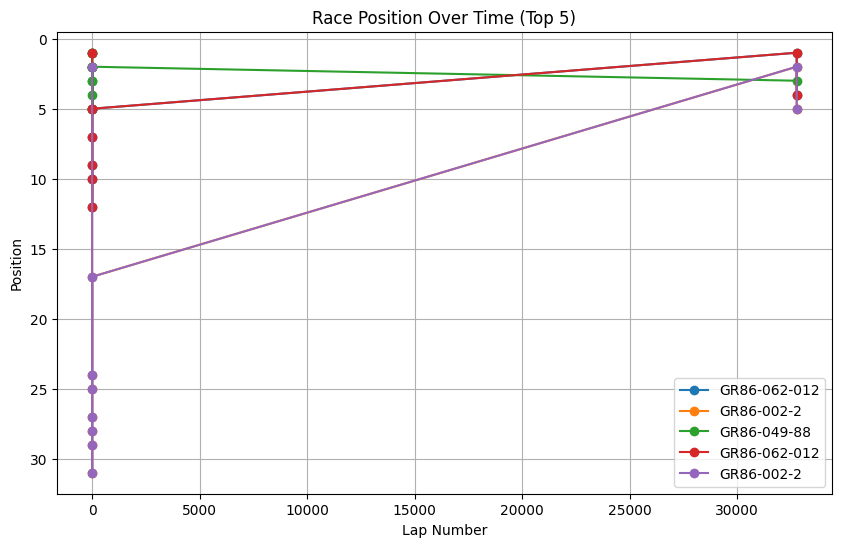

In [4]:
final_lap = race_state_df["lap_number"].max()

top_cars = (
    race_state_df[race_state_df["lap_number"] == final_lap]
    .sort_values("position")
    .head(5)["car_id"]
    .tolist()
)

subset = race_state_df[race_state_df["car_id"].isin(top_cars)]

plt.figure(figsize=(10,6))
for car in top_cars:
    df = subset[subset["car_id"] == car]
    plt.plot(df["lap_number"], df["position"], marker="o", label=car)

plt.gca().invert_yaxis()
plt.title("Race Position Over Time (Top 5)")
plt.xlabel("Lap Number")
plt.ylabel("Position")
plt.grid(True)
plt.legend()
plt.show()


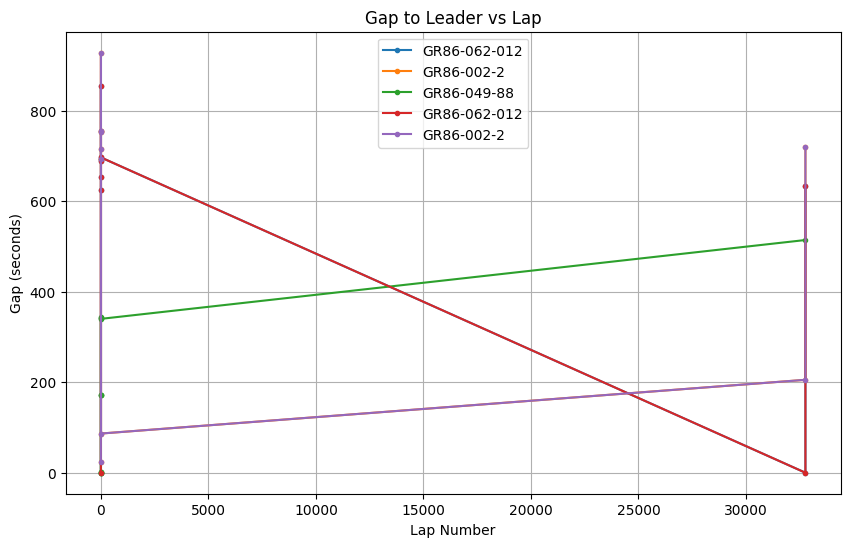

In [5]:
plt.figure(figsize=(10,6))
for car in top_cars:
    df = subset[subset["car_id"] == car]
    plt.plot(df["lap_number"], df["gap_to_leader_s"], marker=".", label=car)

plt.title("Gap to Leader vs Lap")
plt.xlabel("Lap Number")
plt.ylabel("Gap (seconds)")
plt.grid(True)
plt.legend()
plt.show()

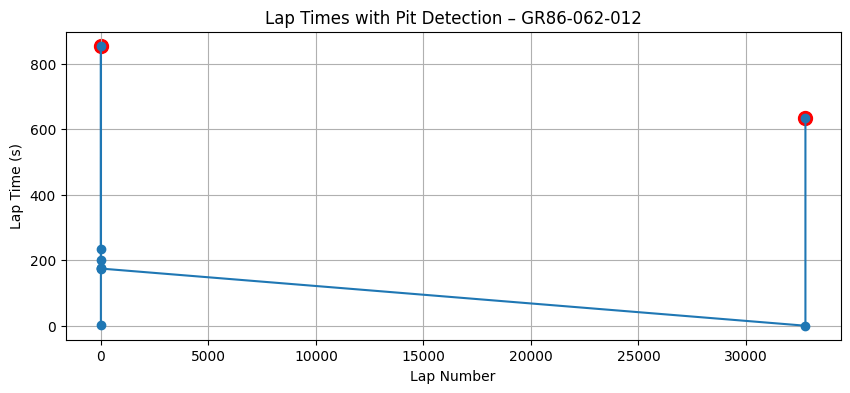

In [6]:
car = top_cars[0]  # change if needed
df = race_state_df[race_state_df["car_id"] == car]

plt.figure(figsize=(10,4))
plt.plot(df["lap_number"], df["lap_time_s"], marker="o")
pit_laps = df[df["pit_like"] == True]
plt.scatter(pit_laps["lap_number"], pit_laps["lap_time_s"], s=100, color="red")
plt.title(f"Lap Times with Pit Detection – {car}")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (s)")
plt.grid(True)
plt.show()


In [7]:
summary = (
    race_state_df.groupby("car_id")
    .agg(
        laps=("lap_number", "max"),
        avg_lap=("lap_time_s", "mean"),
        best_lap=("lap_time_s", "min"),
        consistency=("lap_time_s", "std"),
        pit_count=("pit_like", "sum"),
        finish_position=("position", "last")
    )
    .sort_values("finish_position")
)

summary.head(10)


,laps,avg_lap,best_lap,consistency,pit_count,finish_position
car_id,,,,,,
GR86-004-78,6,186.566500,169.323,25.982119,0,1
GR86-037-03,7,279.615286,169.445,249.935782,2,1
GR86-032-15,7,283.952143,169.815,256.072197,1,2
GR86-040-3,7,284.324000,169.895,259.003224,1,3
GR86-049-88,32768,179.193615,-0.090,225.404849,2,3
GR86-035-11,7,285.343571,170.619,259.819634,1,4
GR86-012-8,6,302.215500,174.403,270.054395,1,4
GR86-062-012,32768,272.062333,-0.537,285.501710,2,4
GR86-024-41,7,285.788571,170.604,261.687909,1,5
